In [1]:
# BLOK 1 
# IMPORTOVANIE KNIZNIC

import pandas as pd
import numpy as np
import json
from random import randint
import matplotlib.pyplot as plt
from ast import literal_eval

In [ ]:
# ----------------------- SYNTHETIC LIGHT CURVES ----------------------- #
# ----------------------- SYNTHETIC LIGHT CURVES ----------------------- #
# ----------------------- SYNTHETIC LIGHT CURVES ----------------------- #

In [2]:
# BLOK 2 
# Nacitanie datasetu syntetickych kriviek

data_syn = pd.read_csv(r"C:\Users\nemci\OneDrive\Počítač\Bakalárska práca\Data\df_all.csv_v2")

In [3]:
# BLOK 3
# Rozdelenie syntetickych kriviek na podmnozinu neskrvnitych a skvrnitych

data_NoSpotty = data_syn[data_syn["spotty"] == 0]
data_Spotty = data_syn[data_syn["spotty"] == 1]

print("No spotty light curves: ", data_NoSpotty.shape[0]) 
print("Spotty light curves: ", data_Spotty.shape[0])

No spotty light curves:  491425
Spotty light curves:  498982


In [4]:
# BLOK 4
# Diskretizacia - neskvrnite krivky

newData = []
for row in data_NoSpotty['generic_bessell_v']:
    row = json.loads(row)
    minValueOfRow, maxValueOfRow = min(row), max(row)
    newRow = []
    for valueIndex in range(len(row)):
        row[valueIndex] = (row[valueIndex] - minValueOfRow) / (maxValueOfRow - minValueOfRow)
        newRow.append([row[valueIndex]])
    newData.append(newRow)
newData = np.array(newData)

In [5]:
# BLOK 5
# Diskretizacia - skvrnite krivky

newDataSpotty = []
for row in data_Spotty['generic_bessell_v']:
    row = json.loads(row)
    minValueOfRow, maxValueOfRow = min(row), max(row)
    newRow = []
    for valueIndex in range(len(row)):
        row[valueIndex] = (row[valueIndex] - minValueOfRow) / (maxValueOfRow - minValueOfRow)
        newRow.append([row[valueIndex]])
    newDataSpotty.append(newRow)
newDataSpotty = np.array(newDataSpotty)

In [6]:
# BLOK 6
# Vytvorenie cieloveho atributu neskvrnitych kriviek. Hodnota 0 pre dotykove, hodnota 1 pre oddelene krivky

target = []
oc, dt = 0, 0
for row in data_NoSpotty["morphology"]:
    if row == 'over-contact':
        target.append(0)
        oc += 1
    elif row == 'detached':
        target.append(1)
        dt += 1
target = np.array(target)
print('Over-contact no spotty: ' + str(oc) + '\n' + 'Detached no spotty: ' + str(dt))

Over-contact no spotty: 45869
Detached no spotty: 445556


In [7]:
# BLOK 7
# Vytvorenie cieloveho atributu skvrnitych kriviek. Hodnota 0 pre dotykove, hodnota 1 pre oddelene krivky

target_spotty = []
oc_spot, dt_spot = 0, 0
for row in data_Spotty["morphology"]:
    if row == 'over-contact':
        target_spotty.append(0)
        oc_spot += 1
    elif row == 'detached':
        target_spotty.append(1)
        dt_spot += 1
target_spotty = np.array(target_spotty)
print('Over-contact spotty: ' + str(oc_spot) + '\nDetached spotty: ' + str(dt_spot))

Over-contact spotty: 45320
Detached spotty: 453662


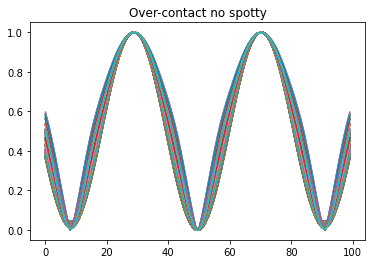

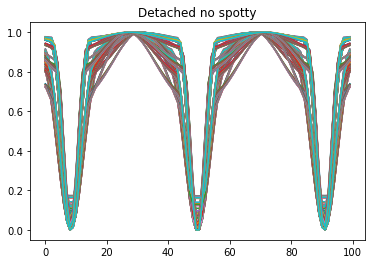

In [8]:
# BLOK 8
# Vyreslenie neskvrnitych oddelenych a neskvrnitych dotykovych kriviek

OCcurves, DTcurves = [], []
for i in range(len(target)):
    if target[i] == 0:
        OCcurves.append(newData[i])
    elif target[i] == 1:
        DTcurves.append(newData[i])
        
# Overcontact
for i in range(300):
    rnd = randint(0, 45868)
    plt.plot(OCcurves[i])
plt.title('Over-contact no spotty')
plt.show()

# Detached
for j in range(300):
    rnd = randint(0, 445555)
    plt.plot(DTcurves[j])
plt.title('Detached no spotty')
plt.show()

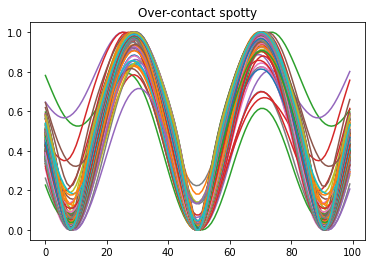

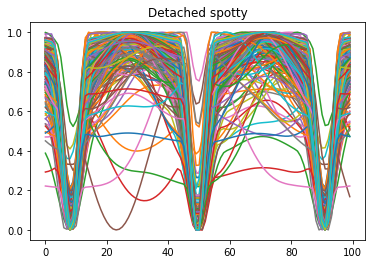

In [9]:
# BLOK 9
# Vyreslenie skvrnitych oddelenych a neskvrnitych dotykovych kriviek

OCcurves_s, DTcurves_s = [], []
for i in range(len(target_spotty)):
    if target_spotty[i] == 0:
        OCcurves_s.append(newDataSpotty[i])
    elif target_spotty[i] == 1:
        DTcurves_s.append(newDataSpotty[i])
        
# Overcontact
for i in range(300):
    rnd = randint(0, 45868)
    plt.plot(OCcurves_s[i])
plt.title('Over-contact spotty')
plt.show()

# Detached
for j in range(300):
    rnd = randint(0, 445555)
    plt.plot(DTcurves_s[j])
plt.title('Detached spotty')
plt.show()

In [ ]:
# ----------------------- OBSERVED LIGHT CURVES ----------------------- #
# ----------------------- OBSERVED LIGHT CURVES ----------------------- #
# ----------------------- OBSERVED LIGHT CURVES ----------------------- #

In [12]:
# BLOK 10
# Zadefinovanie stlpcov. Nacitanie datasetu observacnych kriviek. Vyber potrebnych atributov. Vyber atributu "flux" 
# predstavujuci svietivost krivky.

columns = ['id', 'morphology', 'passband', 'params', 'data', 'origin', 'period', 'target', 'epoch', 'meta']
df = pd.read_csv(r"C:\Users\nemci\OneDrive\Počítač\Bakalárska práca\Data\observed_lc.csv", sep="|", header=None)
df.columns = columns

df = df[["target", "morphology", "data"]]
processed_data = [literal_eval(_data)["flux"] for _data in df["data"]]
morphology = df[["morphology"]].values
processed_data = np.array(processed_data, dtype=np.float32)
processed_data = np.reshape(processed_data, processed_data.shape + (1,))

In [13]:
# BLOK 11
# Vytvorenie cieloveho atributu kriviek. Hodnota 0 pre dotykove, hodnota 1 pre oddelene krivky.

target_obs = []
oc_obs, dt_obs = 0, 0
for row in df["morphology"]:
    if row == 'over-contact':
        target_obs.extend([0])
        oc_obs += 1
    elif row == 'detached':
        target_obs.extend([1])
        dt_obs += 1
target_obs = np.array(target_obs)
print('Over-contact: ' + str(oc_obs) + '\n' + 'Detached:' + str(dt_obs))

Over-contact: 47
Detached:53


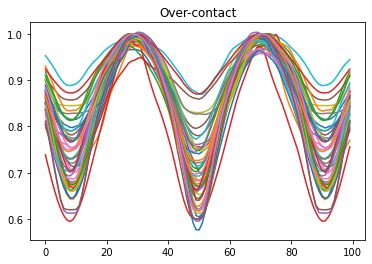

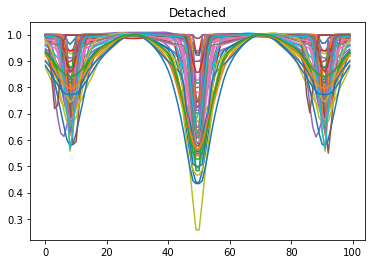

In [14]:
# BLOK 11
# Vyreslenie observacnych dotykovych a oddelenych kriviek

OCcurves_obs, DTcurves_obs = [], []
for i in range(len(target_obs)):
    if target_obs[i] == 0:
        OCcurves_obs.append(processed_data[i])
    elif target_obs[i] == 1:
        DTcurves_obs.append(processed_data[i])
        
# Overcontact
for i in range(47):
    rnd = randint(0, 46)
    plt.plot(OCcurves_obs[i])
plt.title('Over-contact')
plt.show()

# Detached
for j in range(53):
    rnd = randint(0, 52)
    plt.plot(DTcurves_obs[j])
plt.title('Detached')
plt.show()